In [1]:
import papermill
import graphviz

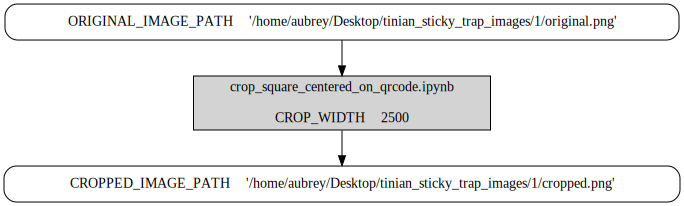

In [7]:
notebook = 'crop_square_centered_on_qrcode.ipynb'
# notebook = 'extract_insect_images.ipynb'
p_dict = papermill.inspect_notebook(notebook)

dot = graphviz.Digraph(node_attr={'shape':'box', 'style':'rounded'})

i = 0
extra_parameters = ''
for key, value in p_dict.items():
    i += 1
    mydict = value
    name = mydict['name']
    default = mydict['default']
    if i==1:
        dot.node('input', label=f'{mydict["name"]}    {mydict["default"]}') 
    if i==2:
        dot.node('output', label=f'{mydict["name"]}    {mydict["default"]}') 
    if i>2:
        extra_parameters += f'{mydict["name"]}    {mydict["default"]}\n'
                 
dot.node('notebook', label=f'{notebook}\n\n{extra_parameters}', style='filled')            
dot.edge('input', 'notebook')
dot.edge('notebook', 'output')
graphviz.Source(dot.source)

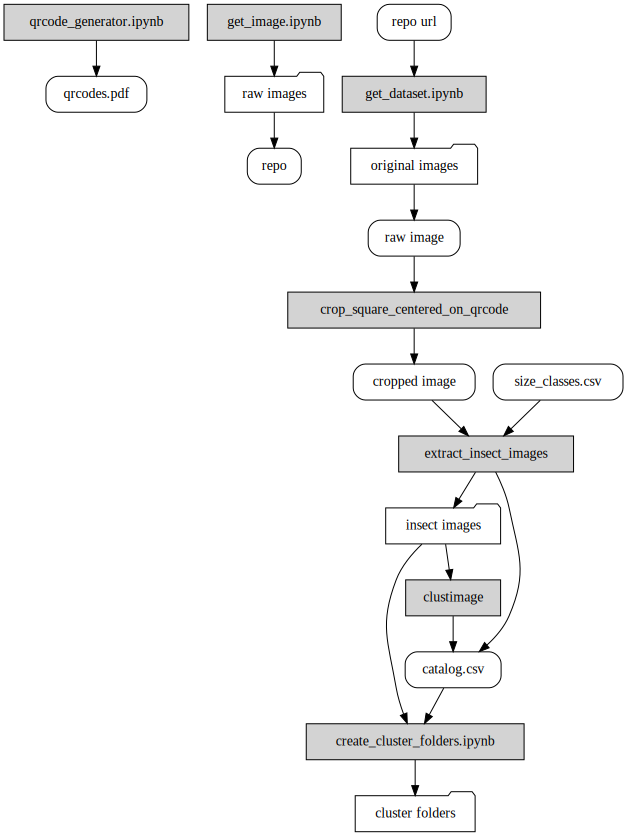

In [16]:
dot = graphviz.Digraph(node_attr={'shape':'box', 'style':'rounded'})

dot.edge('qrcode_generator.ipynb', 'qrcodes.pdf')
dot.edge('get_image.ipynb', 'raw images')
dot.edge('raw images', 'repo')

dot.edge('repo url', 'get_dataset.ipynb')
dot.edge('get_dataset.ipynb', 'original images')
dot.edge('original images', 'raw image')

dot.edge('raw image', 'crop_square_centered_on_qrcode')
dot.edge('crop_square_centered_on_qrcode', 'cropped image')
dot.edge('cropped image','extract_insect_images')
dot.edge('size_classes.csv', 'extract_insect_images')
dot.edge('extract_insect_images', 'insect images')
dot.edge('extract_insect_images', 'catalog.csv')
dot.edge('insect images', 'clustimage')
dot.edge('clustimage', 'catalog.csv')
dot.edge('insect images', 'create_cluster_folders.ipynb')
dot.edge('catalog.csv', 'create_cluster_folders.ipynb')
dot.edge('create_cluster_folders.ipynb', 'cluster folders')

dot.node('clustimage', style='filled')
dot.node('crop_square_centered_on_qrcode', style='filled')
dot.node('extract_insect_images', style='filled')
dot.node('insect images', shape='folder')
dot.node('qrcode_generator.ipynb', style='filled')
dot.node('get_image.ipynb', style='filled')
dot.node('create_cluster_folders.ipynb', style='filled')

dot.node('raw images', shape='folder')
dot.node('cluster folders', shape='folder')
dot.node('original images', shape='folder')
dot.node('get_dataset.ipynb', style='filled')

graphviz.Source(dot.source)